In [25]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import spaCy here
import spacy

# Sklearn libraries for machine learning and text processing
from sklearn.model_selection import train_test_split

# NLTK libraries for text processing (lemmatization, stemming, stopwords, POS tagging)
import nltk

# Set up visualization
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Download necessary NLTK resources for text processing
nltk.download('wordnet')  # WordNet for lemmatization
nltk.download('omw-1.4')  # Open Multilingual Wordnet
nltk.download('punkt')  # Tokenizer
nltk.download('stopwords')  # Stopwords for text cleaning
nltk.download('averaged_perceptron_tagger')  # POS tagger for part-of-speech tagging
nltk.download('tagsets_json')  # Tagset resource



[nltk_data] Downloading package wordnet to /Users/retr0/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/retr0/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /Users/retr0/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/retr0/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/retr0/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets_json to
[nltk_data]     /Users/retr0/nltk_data...
[nltk_data]   Package tagsets_json is already up-to-date!


True

1. Data loading and exploration

In [37]:
#Loading the training set
df_train = pd.read_excel('data/AI_vs_huam_train_dataset.xlsx')

#Check shape
print("Dataset shape (rows, columns):", df_train.shape)

#Check Data types
print("\nColumn data types:")
print(df_train.dtypes)

#View Table
print("\nSample rows:")
print(df_train.head())

Dataset shape (rows, columns): (3728, 2)

Column data types:
essay    object
label     int64
dtype: object

Sample rows:
                                               essay  label
0  International sports events require the most w...      0
1  Globalisation has become a significant aspect ...      0
2  There is an ever-increasing number of bullying...      0
3  It is commonly believed, that companies should...      0
4  Despite knowing about the adverse effects of c...      0


In [27]:
#Number of samples and class counts
n_samples = len(df_train)
class_counts = df_train["label"].value_counts()
print(f"Samples: {n_samples}")
print("Class counts:")
print(class_counts)

Samples: 3728
Class counts:
label
0    1864
1    1864
Name: count, dtype: int64


In [28]:
#One exerpt per class
print("\nSample text exerpts:")
for lbl in df_train["label"].unique():
    excerpt = df_train[df_train["label"]==lbl]["essay"].iloc[0][:200].replace('\n',' ')
    print(f" Label {lbl} → {excerpt}")


Sample text exerpts:
 Label 0 → International sports events require the most well-trained athletes for each country, in order to achieve this goal countries make an effort to build infrastructure designed to train top athletes. Alth
 Label 1 → International sports events demand that countries field their most highly trained athletes, which is why many nations invest in specialized facilities to help their top performers succeed. While this 



== Dataset Shape ==
    Metric  Value
0     Rows   3728
1  Columns      2

== Data Types ==
  Column   Dtype
0  essay  object
1  label   int64

== Class Counts ==
   Class  Count
0      0   1864
1      1   1864


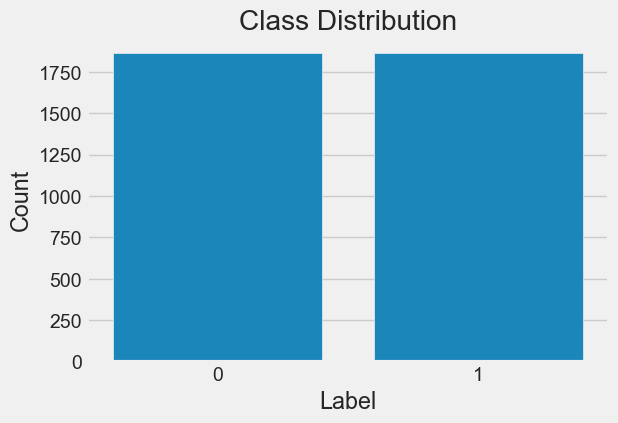

In [29]:
#Dataset Shape table
df_shape = pd.DataFrame({
    "Metric": ["Rows", "Columns"],
    "Value": [df_train.shape[0], df_train.shape[1]]
})
print("\n== Dataset Shape ==")
print(df_shape)

df_dtypes = df_train.dtypes.reset_index()
df_dtypes.columns = ["Column", "Dtype"]
print("\n== Data Types ==")
print(df_dtypes)

class_counts_df = class_counts.reset_index()
class_counts_df.columns = ["Class", "Count"]
print("\n== Class Counts ==")
print(class_counts_df)

plt.figure(figsize=(6,4))
sns.countplot(x="label", data=df_train)
plt.title("Class Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

2. Test preprocessing functions

In [43]:
#Stopword Removal
from nltk.corpus import stopwords
sw = set(stopwords.words('english'))

def remove_sw(text):
  tokens = text.split()
  kept = [t for t in tokens if t.lower() not in sw]
  return " ".join(kept)

simple = df_train["essay"].iloc[0]
print("Before:", simple[:80])
print("After:", remove_sw(simple)[:80])

Before: International sports events require the most well-trained athletes for each coun
After: International sports events require well-trained athletes country, order achieve


In [39]:
#Table for Stopword removal sample

sample = df_train["essay"].iloc[0]

sw_df = pd.DataFrame({
    "Stage":   ["Before", "After"],
    "Excerpt": [
        sample[:80].replace("\n"," "),
        remove_sw(sample)[:80].replace("\n"," ")
    ]
})
print("\n== Stop-word Removal Sample ==")
print(sw_df)

vocab_before = set(" ".join(df_train["essay"]).split())
vocab_after  = set(" ".join(df_train["essay"].apply(remove_sw)).split())
print("\nVocab before:", len(vocab_before))
print("Vocab after: ", len(vocab_after))



== Stop-word Removal Sample ==
    Stage                                            Excerpt
0  Before  International sports events require the most w...
1   After  International sports events require well-train...

Vocab before: 42702
Vocab after:  42333


In [32]:
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer

ps = PorterStemmer()
#sb = SnowballStemmer("english")
#ls = LancasterStemmer()
words = ["running", "ran", "runs"]

stems_df = pd.DataFrame({
    "Word":      words,
    "Porter":    [ps.stem(w) for w in words],
    #"Snowball":  [sb.stem(w) for w in words],
    #"Lancaster": [ls.stem(w) for w in words],
})
print("\n== Stemming Examples ==")
print(stems_df)


== Stemming Examples ==
      Word Porter
0  running    run
1      ran    ran
2     runs    run


In [33]:
from nltk.stem import WordNetLemmatizer

wn  = WordNetLemmatizer()
nlp = spacy.load("en_core_web_sm")

lemmas_df = pd.DataFrame({
    "Word":        words,
    "NLTK Lemma":  [wn.lemmatize(w) for w in words],
    "spaCy Lemma": [nlp(w)[0].lemma_ for w in words],
})
print("\n== Lemmatization Examples ==")
print(lemmas_df)

df_train["processed"] = df_train["essay"].apply(remove_sw)

print("Raw vs. Processed sample:")
print(df_train[["essay", "processed"]].head(1).T)

#X_bow   = cv.fit_transform(df_train["processed"])
#X_tfidf = tfidf.fit_transform(df_train["processed"])

def preprocess_text(text):
    no_sw = remove_sw(text)
    tokens = no_sw.split()
    stems  = [ps.stem(t) for t in tokens]
    return " ".join(stems)

df_train["processed"] = df_train["essay"].apply(preprocess_text)


== Lemmatization Examples ==
      Word NLTK Lemma spaCy Lemma
0  running    running         run
1      ran        ran         run
2     runs        run         run
Raw vs. Processed sample:
                                                           0
essay      International sports events require the most w...
processed  International sports events require well-train...


In [34]:
#define X and Y
X = df_train["processed"]
y = df_train["label"]


In [35]:
#split train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

3. Feature Extraction

In [36]:
#using pandas here
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer(token_pattern=r"/b/w+/b",
     ngram_range=(1,2),
     max_features=5000,
     min_df=5,
     max_df=0.8)

#X_bow = cv.fit_transform(df_train["processed"])
X_train_data = cv.fit_transform(X_train) #vectorized data
X_val_data = cv.transform(X_val)

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
print("BoW matrix shape (docs × features):", X_bow.shape)
bow_shape_df = pd.DataFrame({
    "Metric":  ["Documents", "Features"],
    "Value":   [X_bow.shape[0], X_bow.shape[1]]
})
print("\n== BoW Shape ==")
print(bow_shape_df)

In [ ]:
feat10 = cv.get_feature_names_out()[:10]
feat_df = pd.DataFrame({"First 10 Features": feat10})
print("\n== Sample BoW Features ==")
print(feat_df)

In [ ]:
tfidf = TfidfVectorizer(
    token_pattern=r"\b\w+\b",
    ngram_range=(1,3),    # unigrams + bigrams + trigrams
    max_features=5000,
    min_df=5,
    max_df=0.8
)

X_tfidf = tfidf.fit_transform(df_train["processed"] if "processed" in df_train else df_train["essay"])

#Matrix shape
print("\nTF-IDF matrix shape (docs × features):", X_tfidf.shape)
tfidf_shape_df = pd.DataFrame({
    "Metric":  ["Documents", "Features"],
    "Value":   [X_tfidf.shape[0], X_tfidf.shape[1]]
})
print("\n== TF-IDF Shape ==")
print(tfidf_shape_df)

#Sample feature names
tf10 = tfidf.get_feature_names_out()[:10]
tfidf_feat_df = pd.DataFrame({"First 10 TF-IDF Features": tf10})
print("\n== Sample TF-IDF Features ==")
print(tfidf_feat_df)

4. Model training and hyperparameter tuning

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
#rbf goes to its own function
params = {"kernel": ["linear", "rbf"], "C":[0.1,1,10]}
svc = GridSearchCV(SVC(), params, cv=5, scoring="f1_macro")
svc.fit(X_tfidf, df_train["label"])
print("Best SVM:", svc.best_params_)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

params = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "max_samples_leaf": [1,2]
}
dt = GridSearchCV(DecisionTreeClassifier(), params, cv=5, scoring="f1_macro")
dt.fit(X_bow, df_train["label"])
print("Best DT:", dt.best_params_)

5. Evaluation and Visualization

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

for name, model, x in [("SVM", svc, X_tfidf), ("DT", dt, X_box)]:
  y_pred = model.predict(x)
  print(name, classification_report(df_train["label"], preds))
  cm = confusion_matrix(df_train["label"], preds)
  sns.heatmap(cm, annot=True, fmt="d"); plt.title(f"{name} CM"); plt.show()

In [ ]:
errors = df_train[(preds != df_train["label"])]
errors[["essay","label"]].head(5)

Testing

In [ ]:
X_test = tfidf.transform(df_test["essay"])
df_test["predicted_label"] = svc.predict(X_test)
df_test[["essay_id", "predicted_label"]].to_csv("YourName_test.csv", index=False)